In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
#file = ROOT.TFile.Open("run3a_NE_305stop.root")
file = ROOT.TFile.Open("run3BtoM_4hcopy_ratioFR_cov_mat_0.root")
#direc = file.Get("QFillByFillAnalyzerDB")
hist = ROOT.TH1D()
hist = file.Get("calo_histogram_sum_ratio")
hcov = ROOT.TH2D()
hcov = file.Get("hcov")

In [3]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [4]:
fit_start=30000
fit_stop=300000


T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(75)
dasym=np.empty(75)
rval=np.empty(75)
drval=np.empty(75)
phi=np.empty(75)
dphi=np.empty(75)
A_cbo=np.empty(75)
dA_cbo=np.empty(75)
tau_cbo=np.empty(75)
dtau_cbo=np.empty(75)
omega_cbo=np.empty(75)
domega_cbo=np.empty(75)
phi_cbo=np.empty(75)
dphi_cbo=np.empty(75)
A_cbo_A=np.empty(75)
dA_cbo_A=np.empty(75)
phi_cbo_A=np.empty(75)
dphi_cbo_A=np.empty(75)
A_cbo_phi=np.empty(75)
dA_cbo_phi=np.empty(75)
phi_cbo_phi=np.empty(75)
dphi_cbo_phi=np.empty(75)
A_vw=np.empty(75)
dA_vw=np.empty(75)
tau_vw=np.empty(75)
dtau_vw=np.empty(75)
omega_vw=np.empty(75)
domega_vw=np.empty(75)
phi_vw=np.empty(75)
dphi_vw=np.empty(75)
A_y=np.empty(75)
dA_y=np.empty(75)
tau_y=np.empty(75)
dtau_y=np.empty(75)
omega_y=np.empty(75)
domega_y=np.empty(75)
phi_y=np.empty(75)
dphi_y=np.empty(75)
A_2cbo=np.empty(75)
dA_2cbo=np.empty(75)
tau_2cbo=np.empty(75)
dtau_2cbo=np.empty(75)
omega_2cbo=np.empty(75)
domega_2cbo=np.empty(75)
phi_2cbo=np.empty(75)
dphi_2cbo=np.empty(75)
tau_rlx=np.empty(75)
dtau_rlx=np.empty(75)
A_cbot=np.empty(75)
dA_cbot=np.empty(75)
A_cbovw=np.empty(75)
dA_cbovw=np.empty(75)
phi_cbovw=np.empty(75)
dphi_cbovw=np.empty(75)



fit_st=np.empty(75)

kband1p=np.empty(75)
kband1m=np.empty(75)
kband2p=np.empty(75)
kband2m=np.empty(75)
kband3p=np.empty(75)
kband3m=np.empty(75)
kband4p=np.empty(75)
kband4m=np.empty(75)
kband5p=np.empty(75)
kband5m=np.empty(75)
kband6p=np.empty(75)
kband6m=np.empty(75)
kband7p=np.empty(75)
kband7m=np.empty(75)
kband8p=np.empty(75)
kband8m=np.empty(75)
kband9p=np.empty(75)
kband9m=np.empty(75)
kband10p=np.empty(75)
kband10m=np.empty(75)
kband11p=np.empty(75)
kband11m=np.empty(75)
kband12p=np.empty(75)
kband12m=np.empty(75)
kband13p=np.empty(75)
kband13m=np.empty(75)
kband14p=np.empty(75)
kband14m=np.empty(75)
kband15p=np.empty(75)
kband15m=np.empty(75)
kband16p=np.empty(75)
kband16m=np.empty(75)
kband17p=np.empty(75)
kband17m=np.empty(75)
kband18p=np.empty(75)
kband18m=np.empty(75)
kband19p=np.empty(75)
kband19m=np.empty(75)
kband20p=np.empty(75)
kband20m=np.empty(75)
kband21p=np.empty(75)
kband21m=np.empty(75)
kband22p=np.empty(75)
kband22m=np.empty(75)
kband23p=np.empty(75)
kband23m=np.empty(75)
kband24p=np.empty(75)
kband24m=np.empty(75)
kband25p=np.empty(75)
kband25m=np.empty(75)
kband26p=np.empty(75)
kband26m=np.empty(75)
kband27p=np.empty(75)
kband27m=np.empty(75)



In [5]:
def fit_func(time: np.double,
             asym: np.double = 0.0, 
             R: np.double = 0.0, 
             phi: np.double = 0.0,
             asym_cbo = 0.0,
             tau_cbo = 0.0,
             omega_cbo = 0.0,
             phi_cbo = 0.0,
             asym_cbo_A = 0.0,
             phi_cbo_A=0.0,
             A_cbo_phi= 0.0,
             phi_cbo_phi=0.0,
             asym_vw= 0.0,
             tau_vw = 0.0,
             omega_vw = 0.0,
             phi_vw = 0.0,
             asym_vbo= 0.0,
             tau_vbo = 0.0,
             omega_vbo = 0.0,
             phi_vbo = 0.0,
             asym_2cbo= 0.0,
             phi_2cbo = 0.0,
             tau_rlx = 0.0,
             A_cbot = 0.0,
             A_cbovw = 0.0,
             phi_cbovw = 0.0)-> np.double:
    
    tau_cbot = 24228  
    
    tau_cbovw = 17680
    omega_cbovw = 0.012

    
    omega_cbot=omega_cbo*(1+A_cbot*exp(-time/tau_cbot))
    omega_cbotf=omega_cbo*(1+A_cbot*exp(-(time+T_a/2)/tau_cbot))
    omega_cbotb=omega_cbo*(1+A_cbot*exp(-(time-T_a/2)/tau_cbot))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo))
    
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_A))
    
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbot*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbotf*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbotb*(time - T_a/2) - phi_cbo_phi))
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    N2cbo=(asym_2cbo*exp(-2*time/tau_cbo)*cos(2*omega_cbot*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-2*(time + T_a/2)/tau_cbo)*cos(2*omega_cbotf*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-2*(time - T_a/2)/tau_cbo)*cos(2*omega_cbotb*(time - T_a/2) - phi_2cbo))
    
    Ncbovw=(1+ A_cbovw*exp(-time/tau_cbovw)*cos(omega_cbovw*time - phi_cbovw))
    Ncbovwf=(1+ A_cbovw*exp(-(time + T_a/2)/tau_cbovw)*cos(omega_cbovw*(time + T_a/2) - phi_cbovw))
    Ncbovwb=(1+ A_cbovw*exp(-(time - T_a/2)/tau_cbovw)*cos(omega_cbovw*(time - T_a/2) - phi_cbovw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    
    f=(1+ asym*exp(-time/tau_rlx)*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*exp(-(time+T_a/2)/tau_rlx)*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*exp(-(time-T_a/2)/tau_rlx)*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Ncbovw - ff*Ncbof*Nvwf*Nvbof*Ncbovwf - fb*Ncbob*Nvwb*Nvbob*Ncbovwb)/(2*f*Ncbo*Nvw*Nvbo*Ncbovw + ff*Ncbof*Nvwf*Nvbof*Ncbovwf + fb*Ncbob*Nvwb*Nvbob*Ncbovwb)

In [6]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.54062e+05,
        2.330e-03,
        5.56481e-01,
        6.91318e-04,
        -5.78075e+00,
        6.39026e-05,
        3.52887e+01,
        2.36536e-04,
        1.38419e+05,
        1.389e-02,
        2.73495e-01,
        -1.00112e-03,
        3.48295e+04,
        1.407e-02,
        -1.99555e+01,
        1.10668e-04,
        3.06805e+00,
        3.7000e+08,
        0.0047,
        0.00014,
        4.2]

In [7]:
%%time
for ist in range (0,75):
    fit_range=hist.FindBin(fit_stop)-hist.FindBin(fit_start)+1
    y_val=np.empty(fit_range)
    y_err=np.empty(fit_range)
    x_val=np.empty(fit_range)
    y_cov = np.empty(shape=(fit_range,fit_range))
    
    for ibin in range (0,fit_range):
        y_val[ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
    if ist == 0:
        pars2, cov2 = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_err)
        p_init=pars2
    
    
            
    pars, cov = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_cov)  
    
    stdevs=np.sqrt(np.diag(cov))
    
    fit_st[ist]=fit_start
    
    asym[ist]=pars[0]
    dasym[ist]=stdevs[0]
    rval[ist]=pars[1]
    drval[ist]=stdevs[1]
    phi[ist]=pars[2]
    dphi[ist]=stdevs[2]
    A_cbo[ist]=pars[3]
    dA_cbo[ist]=stdevs[3]
    tau_cbo[ist]=pars[4]
    dtau_cbo[ist]=stdevs[4]
    omega_cbo[ist]=pars[5]
    domega_cbo[ist]=stdevs[5]
    phi_cbo[ist]=pars[6]
    dphi_cbo[ist]=stdevs[6]
    A_cbo_A[ist]=pars[7]
    dA_cbo_A[ist]=stdevs[7]
    phi_cbo_A[ist]=pars[8]
    dphi_cbo_A[ist]=stdevs[8]
    A_cbo_phi[ist]=pars[9]
    dA_cbo_phi[ist]=stdevs[9]
    phi_cbo_phi[ist]=pars[10]
    dphi_cbo_phi[ist]=stdevs[10]
    A_y[ist]=pars[11]
    dA_y[ist]=stdevs[11]
    tau_y[ist]=pars[12]
    dtau_y[ist]=stdevs[12]
    omega_y[ist]=pars[13]
    domega_y[ist]=stdevs[13]
    phi_y[ist]=pars[14]
    dphi_y[ist]=stdevs[14]
    A_vw[ist]=pars[15]
    dA_vw[ist]=stdevs[15]
    tau_vw[ist]=pars[16]
    dtau_vw[ist]=stdevs[16]
    omega_vw[ist]=pars[17]
    domega_vw[ist]=stdevs[17]
    phi_vw[ist]=pars[18]
    dphi_vw[ist]=stdevs[18]
    A_2cbo[ist]=pars[19]
    dA_2cbo[ist]=stdevs[19]
    phi_2cbo[ist]=pars[20]
    dphi_2cbo[ist]=stdevs[20]
    tau_rlx[ist]=pars[21]
    dtau_rlx[ist]=stdevs[21]
    A_cbot[ist]=pars[22]
    dA_cbot[ist]=stdevs[22]
    A_cbovw[ist]=pars[23]
    dA_cbovw[ist]=stdevs[23]
    phi_cbovw[ist]=pars[24]
    dphi_cbovw[ist]=stdevs[24]



    
    p_init=pars  
    fit_start=fit_start+1000

CPU times: user 11min 9s, sys: 3min, total: 14min 10s
Wall time: 11min 35s


In [8]:
stdevs

array([4.26381560e-05, 8.01535954e-01, 1.89572251e-04, 8.85580069e-05,
       1.99478473e+04, 6.20059271e-07, 1.18897142e-01, 1.42127748e-04,
       1.93699400e-01, 1.38536430e-04, 2.06432048e+00, 1.60895676e-04,
       5.64111666e+04, 4.07739120e-06, 5.62513579e-01, 2.26261847e-04,
       1.13004851e+05, 1.25901787e-05, 1.68753659e+00, 4.38145225e-05,
       2.82397846e-01, 5.07150639e+08, 2.26791634e-02, 1.27187815e-01,
       9.83420279e-01])

In [9]:
pars

array([ 2.29386039e-01, -3.63121198e+01,  4.02312088e+00,  1.87788538e-03,
        2.50441884e+05,  2.32909411e-03, -5.64063354e-01,  8.97711487e-04,
       -6.52676485e+00, -6.66696703e-05,  3.56892333e+01,  2.86618694e-04,
        1.17711461e+05,  1.38972885e-02,  2.03285907e-01, -1.34337962e-04,
        9.48081261e+04,  1.40987109e-02, -2.06982726e+01,  2.45611618e-04,
        3.38364578e+00,  6.70112185e+08, -2.61299999e-02, -1.29800149e-01,
       -4.04492702e+01])

In [10]:
for ist in range (46,50):
    fit_range=hist.FindBin(fit_stop)-hist.FindBin(fit_start)+1
    y_val=np.empty(fit_range)
    y_err=np.empty(fit_range)
    x_val=np.empty(fit_range)
    y_cov = np.empty(shape=(fit_range,fit_range))
    
    for ibin in range (0,fit_range):
        y_val[ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
       
    
            
    pars, cov = opt.curve_fit(f=fit_func, xdata=x_val, ydata=y_val, p0=p_init, sigma=y_cov)  
    
    stdevs=np.sqrt(np.diag(cov))
    
    fit_st[ist]=fit_start
    
    asym[ist]=pars[0]
    dasym[ist]=stdevs[0]
    rval[ist]=pars[1]
    drval[ist]=stdevs[1]
    phi[ist]=pars[2]
    dphi[ist]=stdevs[2]
    A_cbo[ist]=pars[3]
    dA_cbo[ist]=stdevs[3]
    tau_cbo[ist]=pars[4]
    dtau_cbo[ist]=stdevs[4]
    omega_cbo[ist]=pars[5]
    domega_cbo[ist]=stdevs[5]
    phi_cbo[ist]=pars[6]
    dphi_cbo[ist]=stdevs[6]
    A_cbo_A[ist]=pars[7]
    dA_cbo_A[ist]=stdevs[7]
    phi_cbo_A[ist]=pars[8]
    dphi_cbo_A[ist]=stdevs[8]
    A_cbo_phi[ist]=pars[9]
    dA_cbo_phi[ist]=stdevs[9]
    phi_cbo_phi[ist]=pars[10]
    dphi_cbo_phi[ist]=stdevs[10]
    A_y[ist]=pars[11]
    dA_y[ist]=stdevs[11]
    tau_y[ist]=pars[12]
    dtau_y[ist]=stdevs[12]
    omega_y[ist]=pars[13]
    domega_y[ist]=stdevs[13]
    phi_y[ist]=pars[14]
    dphi_y[ist]=stdevs[14]
    A_vw[ist]=pars[15]
    dA_vw[ist]=stdevs[15]
    tau_vw[ist]=pars[16]
    dtau_vw[ist]=stdevs[16]
    omega_vw[ist]=pars[17]
    domega_vw[ist]=stdevs[17]
    phi_vw[ist]=pars[18]
    dphi_vw[ist]=stdevs[18]
    A_2cbo[ist]=pars[19]
    dA_2cbo[ist]=stdevs[19]
    phi_2cbo[ist]=pars[20]
    dphi_2cbo[ist]=stdevs[20]
    tau_rlx[ist]=pars[21]
    dtau_rlx[ist]=stdevs[21]
    A_cbot[ist]=pars[22]
    dA_cbot[ist]=stdevs[22]
    A_cbovw[ist]=pars[23]
    dA_cbovw[ist]=stdevs[23]
    phi_cbovw[ist]=pars[24]
    dphi_cbovw[ist]=stdevs[24]



    
    p_init=pars  
    fit_start=fit_start+1000

KeyboardInterrupt: 

In [11]:
stdevs

array([4.27782403e-05, 8.12632321e-01, 1.93284242e-04, 9.11611090e-05,
       2.02415012e+04, 6.25570769e-07, 1.20264701e-01, 1.43405647e-04,
       1.95005877e-01, 1.40844351e-04, 2.11869509e+00, 1.39616530e-04,
       6.88657543e+04, 4.02235060e-06, 5.63277484e-01, 3.89334981e-05,
       6.23177194e+07, 8.04372748e-06, 1.32734993e+00, 4.47000932e-05,
       2.86105712e-01, 4.99101846e+08, 2.32903043e-02, 1.37260111e-01,
       1.45600502e+00])

In [12]:
drval

array([0.40060251, 0.40383879, 0.40254314, 0.40793098, 0.40803374,
       0.41225354, 0.41228181, 0.41926732, 0.41879371, 0.42282128,
       0.4259105 , 0.43092155, 0.43517645, 0.43699722, 0.44263818,
       0.44436893, 0.45201302, 0.45349566, 0.45974131, 0.46161773,
       0.46881279, 0.47200038, 0.47761501, 0.4800088 , 0.48345781,
       0.49113838, 0.4912507 , 0.49789997, 0.50052419, 0.51035961,
       0.51147574, 0.51888184, 0.52187276, 0.52787193, 0.53303535,
       0.53915255, 0.5436951 , 0.54604666, 0.55604251, 0.55655786,
       0.56597979, 0.56827701, 0.57933416, 0.58251018, 0.59178368,
       0.59521532, 0.81263232, 0.6093354 , 0.61247011, 0.6192612 ,
       0.62197686, 0.63086241, 0.63425623, 0.64512595, 0.64609738,
       0.65606241, 0.66039321, 0.66703494, 0.67226153, 0.68064598,
       0.68998539, 0.69503786, 0.70506734, 0.70785022, 0.72204623,
       0.72475842, 0.73524944, 0.73999815, 0.75471764, 0.7586294 ,
       0.76864391, 0.77764386, 0.78576732, 0.79448205, 0.80153

In [13]:
drval

array([0.40060251, 0.40383879, 0.40254314, 0.40793098, 0.40803374,
       0.41225354, 0.41228181, 0.41926732, 0.41879371, 0.42282128,
       0.4259105 , 0.43092155, 0.43517645, 0.43699722, 0.44263818,
       0.44436893, 0.45201302, 0.45349566, 0.45974131, 0.46161773,
       0.46881279, 0.47200038, 0.47761501, 0.4800088 , 0.48345781,
       0.49113838, 0.4912507 , 0.49789997, 0.50052419, 0.51035961,
       0.51147574, 0.51888184, 0.52187276, 0.52787193, 0.53303535,
       0.53915255, 0.5436951 , 0.54604666, 0.55604251, 0.55655786,
       0.56597979, 0.56827701, 0.57933416, 0.58251018, 0.59178368,
       0.59521532, 0.81263232, 0.6093354 , 0.61247011, 0.6192612 ,
       0.62197686, 0.63086241, 0.63425623, 0.64512595, 0.64609738,
       0.65606241, 0.66039321, 0.66703494, 0.67226153, 0.68064598,
       0.68998539, 0.69503786, 0.70506734, 0.70785022, 0.72204623,
       0.72475842, 0.73524944, 0.73999815, 0.75471764, 0.7586294 ,
       0.76864391, 0.77764386, 0.78576732, 0.79448205, 0.80153

In [14]:
A_cbot

array([ 4.94131035e-03,  5.16165038e-03,  5.61922587e-03,  5.13283095e-03,
        5.21974399e-03,  4.71115959e-03,  4.56869898e-03,  5.33839545e-03,
        5.86460289e-03,  6.25662720e-03,  5.29593680e-03,  5.03912364e-03,
        5.53338210e-03,  5.70462745e-03,  5.70698608e-03,  6.21888859e-03,
        6.01694166e-03,  6.29539981e-03,  5.85942699e-03,  5.78297419e-03,
        4.59042233e-03,  5.00131492e-03,  4.60265601e-03,  5.14096724e-03,
        6.41147850e-03,  5.56732960e-03,  6.95728089e-03,  7.14733224e-03,
        6.02824805e-03,  6.89286925e-03,  7.48933118e-03,  6.97596648e-03,
        7.45828850e-03,  5.94504493e-03,  4.90678215e-03,  5.75926075e-03,
        2.95521898e-03,  1.98137064e-03,  2.24266794e-03,  3.44230278e-06,
        1.21491979e-04,  1.64725186e-03,  1.95815129e-03,  1.75996431e-03,
        2.17185100e-03,  5.50793136e-03, -2.85504460e-02, -1.54545422e-03,
        2.07022304e-04,  2.91653268e-04, -6.26326262e-03, -5.22438555e-03,
       -6.98323001e-03, -

In [15]:
for icalo in range(0,75):
    while phi_cbo[icalo] < 0:
        phi_cbo[icalo] = phi_cbo[icalo] + 6.28
    while phi_y[icalo] < 0:
        phi_y[icalo] = phi_y[icalo] + 6.28
    while phi_vw[icalo] < 0:
        phi_vw[icalo] = phi_vw[icalo] + 6.28
    while phi_cbovw[icalo] < 0:
        phi_cbovw[icalo] = phi_cbovw[icalo] + 6.28
    while phi_cbo[icalo] > 6.28:
        phi_cbo[icalo] = phi_cbo[icalo] - 6.28
    while phi_y[icalo] > 6.28:
        phi_y[icalo] = phi_y[icalo] - 6.28
    while phi_vw[icalo] > 6.28:
        phi_vw[icalo] = phi_vw[icalo] - 6.28
    while phi_cbovw[icalo] > 6.28:
        phi_cbovw[icalo] = phi_cbovw[icalo] - 6.28

In [16]:
kband1p[0]=asym[0]
kband1m[0]=asym[0]
kband2p[0]=rval[0]
kband2m[0]=rval[0]
kband3p[0]=phi[0]
kband3m[0]=phi[0]
kband4p[0]=A_cbo[0]
kband4m[0]=A_cbo[0]
kband5p[0]=tau_cbo[0]
kband5m[0]=tau_cbo[0]
kband6p[0]=omega_cbo[0]
kband6m[0]=omega_cbo[0]
kband7p[0]=phi_cbo[0]
kband7m[0]=phi_cbo[0]
kband8p[0]=A_cbo_A[0]
kband8m[0]=A_cbo_A[0]
kband9p[0]=phi_cbo_A[0]
kband9m[0]=phi_cbo_A[0]
kband10p[0]=A_cbo_phi[0]
kband10m[0]=A_cbo_phi[0]
kband11p[0]=phi_cbo_phi[0]
kband11m[0]=phi_cbo_phi[0]
kband12p[0]=A_vw[0]
kband12m[0]=A_vw[0]
kband13p[0]=tau_vw[0]
kband13m[0]=tau_vw[0]
kband14p[0]=omega_vw[0]
kband14m[0]=omega_vw[0]
kband15p[0]=phi_vw[0]
kband15m[0]=phi_vw[0]
kband16p[0]=A_y[0]
kband16m[0]=A_y[0]
kband17p[0]=tau_y[0]
kband17m[0]=tau_y[0]
kband18p[0]=omega_y[0]
kband18m[0]=omega_y[0]
kband19p[0]=phi_y[0]
kband19m[0]=phi_y[0]
kband20p[0]=A_2cbo[0]
kband20m[0]=A_2cbo[0]
kband21p[0]=phi_2cbo[0]
kband21m[0]=phi_2cbo[0]
                    
for m in range (1,75):
    kband1p[m]=kband1p[0] + np.sqrt(np.absolute(dasym[m]*dasym[m] - dasym[0]*dasym[0]))
    kband1m[m]=kband1m[0] - np.sqrt(np.absolute(dasym[m]*dasym[m] - dasym[0]*dasym[0]))
    kband2p[m]=kband2p[0] + np.sqrt(np.absolute(drval[m]*drval[m]-drval[0]*drval[0]))
    kband2m[m]=kband2m[0] - np.sqrt(np.absolute(drval[m]*drval[m]-drval[0]*drval[0]))
    kband3p[m]=kband3p[0] + np.sqrt(np.absolute(dphi[m]*dphi[m] - dphi[0]*dphi[0]))
    kband3m[m]=kband3m[0] - np.sqrt(np.absolute(dphi[m]*dphi[m] - dphi[0]*dphi[0]))
    kband4p[m]=kband4p[0] + np.sqrt(np.absolute(dA_cbo[m]*dA_cbo[m] - dA_cbo[0]*dA_cbo[0]))
    kband4m[m]=kband4m[0] - np.sqrt(np.absolute(dA_cbo[m]*dA_cbo[m] - dA_cbo[0]*dA_cbo[0]))
    kband5p[m]=kband5p[0] + np.sqrt(np.absolute(dtau_cbo[m]*dtau_cbo[m] - dtau_cbo[0]*dtau_cbo[0]))
    kband5m[m]=kband5m[0] - np.sqrt(np.absolute(dtau_cbo[m]*dtau_cbo[m] - dtau_cbo[0]*dtau_cbo[0]))
    kband6p[m]=kband6p[0] + np.sqrt(np.absolute(domega_cbo[m]*domega_cbo[m] - domega_cbo[0]*domega_cbo[0]))
    kband6m[m]=kband6m[0] - np.sqrt(np.absolute(domega_cbo[m]*domega_cbo[m] - domega_cbo[0]*domega_cbo[0]))
    kband7p[m]=kband7p[0] + np.sqrt(np.absolute(dphi_cbo[m]*dphi_cbo[m] - dphi_cbo[0]*dphi_cbo[0]))
    kband7m[m]=kband7m[0] - np.sqrt(np.absolute(dphi_cbo[m]*dphi_cbo[m] - dphi_cbo[0]*dphi_cbo[0]))
    kband8p[m]=kband8p[0] + np.sqrt(np.absolute(dA_cbo_A[m]*dA_cbo_A[m] - dA_cbo_A[0]*dA_cbo_A[0]))
    kband8m[m]=kband8m[0] - np.sqrt(np.absolute(dA_cbo_A[m]*dA_cbo_A[m] - dA_cbo_A[0]*dA_cbo_A[0]))
    kband9p[m]=kband9p[0] + np.sqrt(np.absolute(dphi_cbo_A[m]*dphi_cbo_A[m] - dphi_cbo_A[0]*dphi_cbo_A[0]))
    kband9m[m]=kband9m[0] - np.sqrt(np.absolute(dphi_cbo_A[m]*dphi_cbo_A[m] - dphi_cbo_A[0]*dphi_cbo_A[0]))
    kband10p[m]=kband10p[0] + np.sqrt(np.absolute(dA_cbo_phi[m]*dA_cbo_phi[m] - dA_cbo_phi[0]*dA_cbo_phi[0]))
    kband10m[m]=kband10m[0] - np.sqrt(np.absolute(dA_cbo_phi[m]*dA_cbo_phi[m] - dA_cbo_phi[0]*dA_cbo_phi[0]))
    kband11p[m]=kband11p[0] + np.sqrt(np.absolute(dphi_cbo_phi[m]*dphi_cbo_phi[m] - dphi_cbo_phi[0]*dphi_cbo_phi[0]))
    kband11m[m]=kband11m[0] - np.sqrt(np.absolute(dphi_cbo_phi[m]*dphi_cbo_phi[m] - dphi_cbo_phi[0]*dphi_cbo_phi[0]))
    kband12p[m]=kband12p[0] + np.sqrt(np.absolute(dA_vw[m]*dA_vw[m] - dA_vw[0]*dA_vw[0]))
    kband12m[m]=kband12m[0] - np.sqrt(np.absolute(dA_vw[m]*dA_vw[m] - dA_vw[0]*dA_vw[0]))
    kband13p[m]=kband13p[0] + np.sqrt(np.absolute(dtau_vw[m]*dtau_vw[m] - dtau_vw[0]*dtau_vw[0]))
    kband13m[m]=kband13m[0] - np.sqrt(np.absolute(dtau_vw[m]*dtau_vw[m] - dtau_vw[0]*dtau_vw[0]))
    kband14p[m]=kband14p[0] + np.sqrt(np.absolute(domega_vw[m]*domega_vw[m] - domega_vw[0]*domega_vw[0]))
    kband14m[m]=kband14m[0] - np.sqrt(np.absolute(domega_vw[m]*domega_vw[m] - domega_vw[0]*domega_vw[0]))
    kband15p[m]=kband15p[0] + np.sqrt(np.absolute(dphi_vw[m]*dphi_vw[m] - dphi_vw[0]*dphi_vw[0]))
    kband15m[m]=kband15m[0] - np.sqrt(np.absolute(dphi_vw[m]*dphi_vw[m] - dphi_vw[0]*dphi_vw[0]))
    kband16p[m]=kband16p[0] + np.sqrt(np.absolute(dA_y[m]*dA_y[m] - dA_y[0]*dA_y[0]))
    kband16m[m]=kband16m[0] - np.sqrt(np.absolute(dA_y[m]*dA_y[m] - dA_y[0]*dA_y[0]))
    kband17p[m]=kband17p[0] + np.sqrt(np.absolute(dtau_y[m]*dtau_y[m] - dtau_y[0]*dtau_y[0]))
    kband17m[m]=kband17m[0] - np.sqrt(np.absolute(dtau_y[m]*dtau_y[m] - dtau_y[0]*dtau_y[0]))
    kband18p[m]=kband18p[0] + np.sqrt(np.absolute(domega_y[m]*domega_y[m] - domega_y[0]*domega_y[0]))
    kband18m[m]=kband18m[0] - np.sqrt(np.absolute(domega_y[m]*domega_y[m] - domega_y[0]*domega_y[0]))
    kband19p[m]=kband19p[0] + np.sqrt(np.absolute(dphi_y[m]*dphi_y[m] - dphi_y[0]*dphi_y[0]))
    kband19m[m]=kband19m[0] - np.sqrt(np.absolute(dphi_y[m]*dphi_y[m] - dphi_y[0]*dphi_y[0]))
    kband20p[m]=kband20p[0] + np.sqrt(np.absolute(dA_2cbo[m]*dA_2cbo[m] - dA_2cbo[0]*dA_2cbo[0]))
    kband20m[m]=kband20m[0] - np.sqrt(np.absolute(dA_2cbo[m]*dA_2cbo[m] - dA_2cbo[0]*dA_2cbo[0]))
    kband21p[m]=kband21p[0] + np.sqrt(np.absolute(dphi_2cbo[m]*dphi_2cbo[m] - dphi_2cbo[0]*dphi_2cbo[0]))
    kband21m[m]=kband21m[0] - np.sqrt(np.absolute(dphi_2cbo[m]*dphi_2cbo[m] - dphi_2cbo[0]*dphi_2cbo[0]))



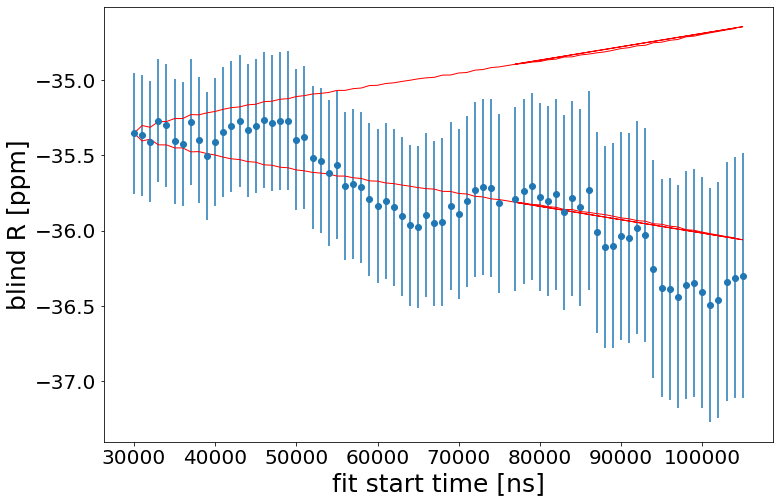

In [17]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(fit_st, rval, yerr=drval, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=25)
plt.ylabel("blind R [ppm]",fontsize=25)
plt.plot(fit_st, kband2p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband2m, linestyle='solid', linewidth=1, color='red')
plt.show()

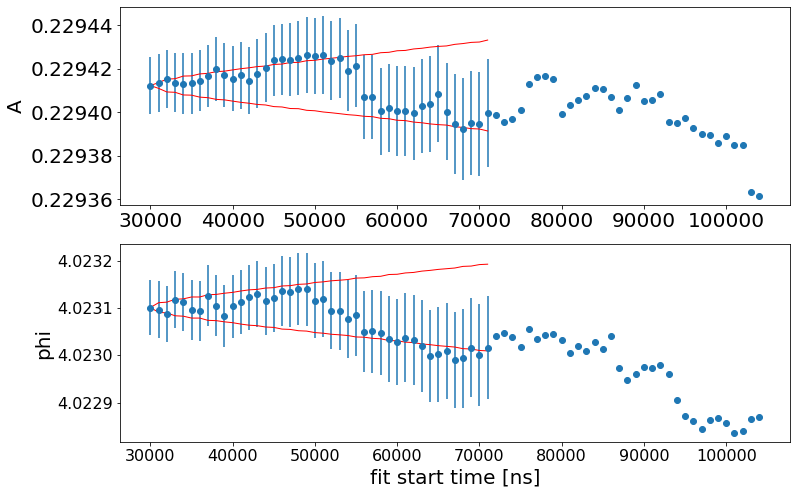

In [12]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, asym, yerr=dasym, fmt="o")
plt.ylabel("A",fontsize=20)
plt.plot(fit_st, kband1p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband1m, linestyle='solid', linewidth=1, color='red')

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi, yerr=dphi, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi",fontsize=20)
plt.plot(fit_st, kband3p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband3m, linestyle='solid', linewidth=1, color='red')

plt.show()

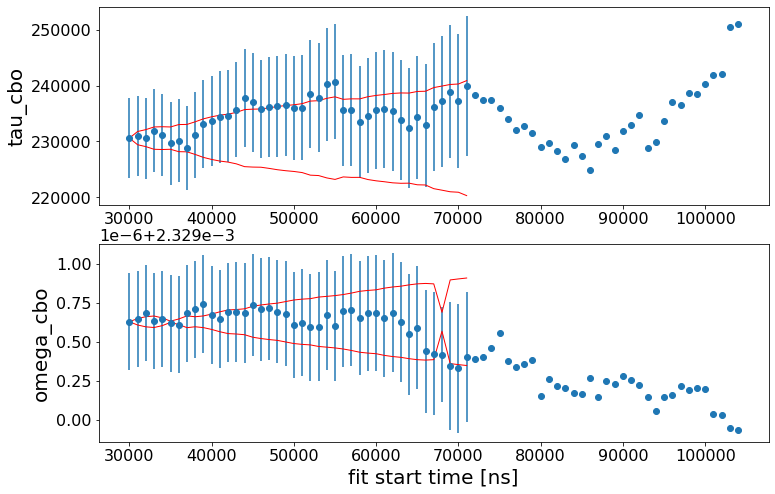

In [13]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.ylabel("tau_cbo",fontsize=20)
plt.plot(fit_st, kband5p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband5m, linestyle='solid', linewidth=1, color='red')

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_cbo, yerr=domega_cbo, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("omega_cbo",fontsize=20)
plt.plot(fit_st, kband6p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband6m, linestyle='solid', linewidth=1, color='red')

plt.show()

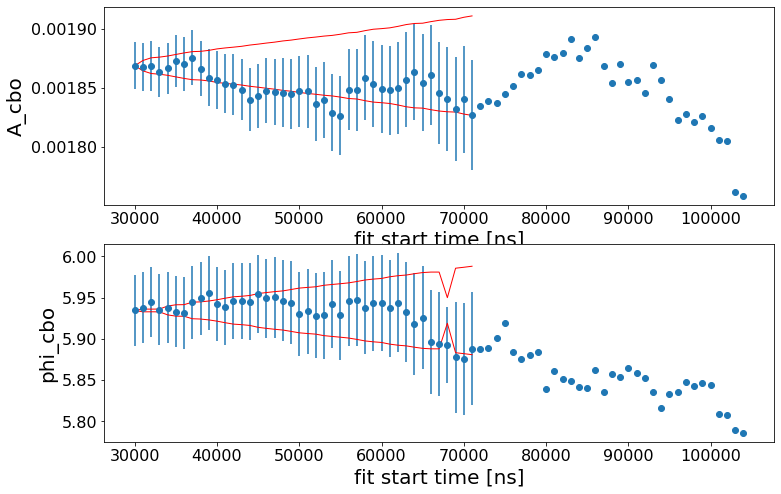

In [14]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_cbo, yerr=dA_cbo, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("A_cbo",fontsize=20)
plt.plot(fit_st, kband4p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband4m, linestyle='solid', linewidth=1, color='red')


plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_cbo, yerr=dphi_cbo, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_cbo",fontsize=20)
plt.plot(fit_st, kband7p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband7m, linestyle='solid', linewidth=1, color='red')

plt.show()

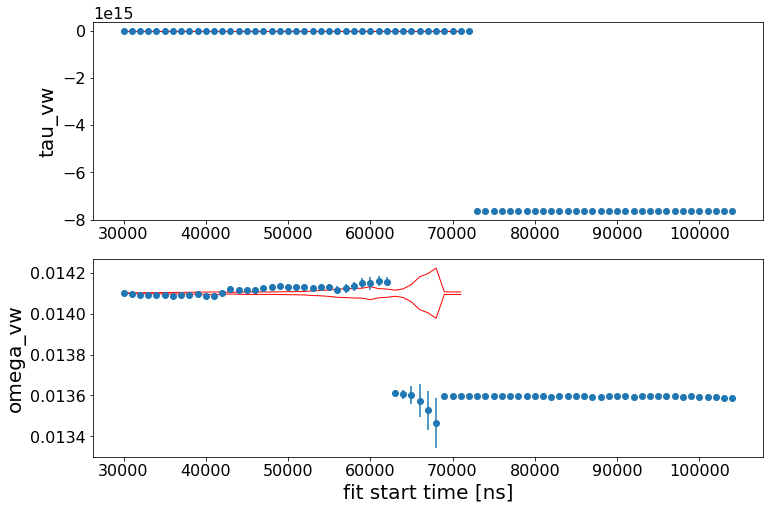

In [15]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_vw, yerr=dtau_vw, fmt="o")
plt.ylabel("tau_vw",fontsize=20)
plt.plot(fit_st, kband13p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband13m, linestyle='solid', linewidth=1, color='red')
#plt.xlim(30000,55000)
#plt.ylim(9000,75000) 

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_vw, yerr=domega_vw, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("omega_vw",fontsize=20)
plt.plot(fit_st, kband14p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband14m, linestyle='solid', linewidth=1, color='red')
#plt.xlim(30000,55000)

plt.show()


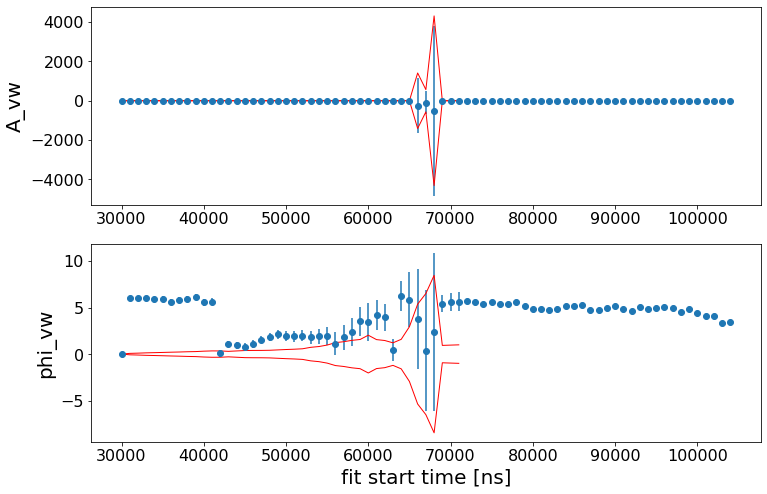

In [16]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_vw, yerr=dA_vw, fmt="o")
plt.ylabel("A_vw",fontsize=20)
plt.plot(fit_st, kband12p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband12m, linestyle='solid', linewidth=1, color='red')
#plt.xlim(30000,55000)



plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_vw, yerr=dphi_vw, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_vw",fontsize=20)
plt.plot(fit_st, kband15p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband15m, linestyle='solid', linewidth=1, color='red')
#plt.xlim(30000,55000)
#plt.ylim(3,5)

plt.show()

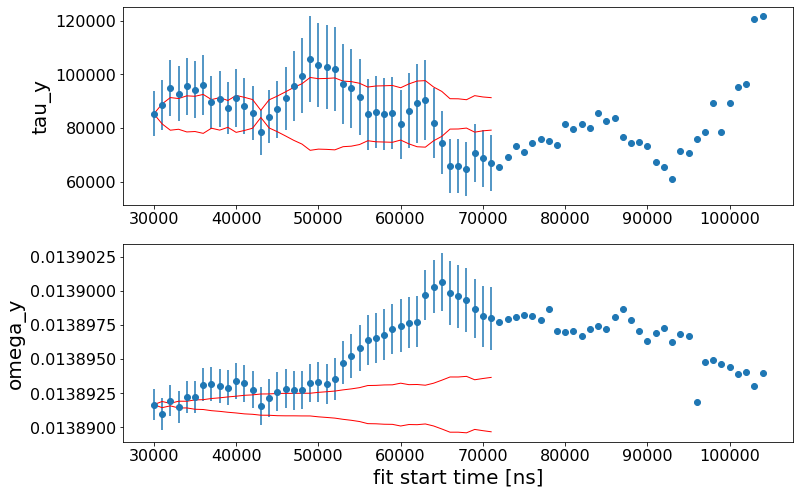

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_y, yerr=dtau_y, fmt="o")
plt.ylabel("tau_y",fontsize=20)
plt.plot(fit_st, kband17p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband17m, linestyle='solid', linewidth=1, color='red')

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_y, yerr=domega_y, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("omega_y",fontsize=20)
plt.plot(fit_st, kband18p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband18m, linestyle='solid', linewidth=1, color='red')

plt.show()


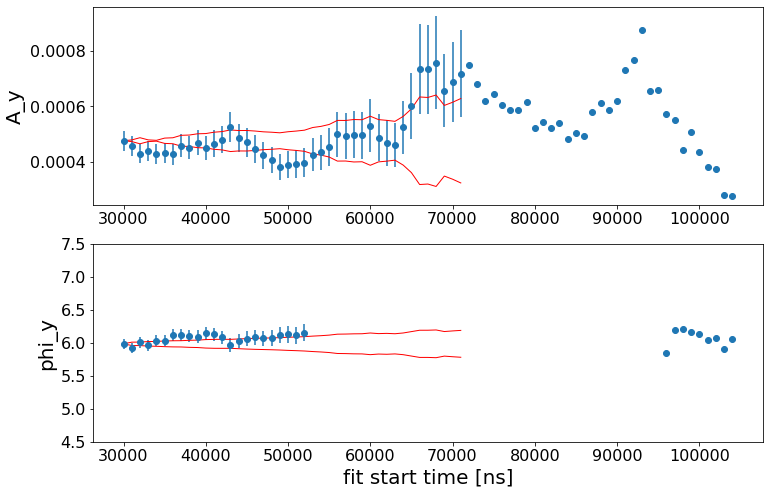

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_y, yerr=dA_y, fmt="o")
plt.ylabel("A_y",fontsize=20)
plt.plot(fit_st, kband16p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband16m, linestyle='solid', linewidth=1, color='red')

plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_y",fontsize=20)
plt.plot(fit_st, kband19p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband19m, linestyle='solid', linewidth=1, color='red')
plt.ylim(4.5,7.5)

plt.show()

Text(0, 0.5, 'tau_rlx')

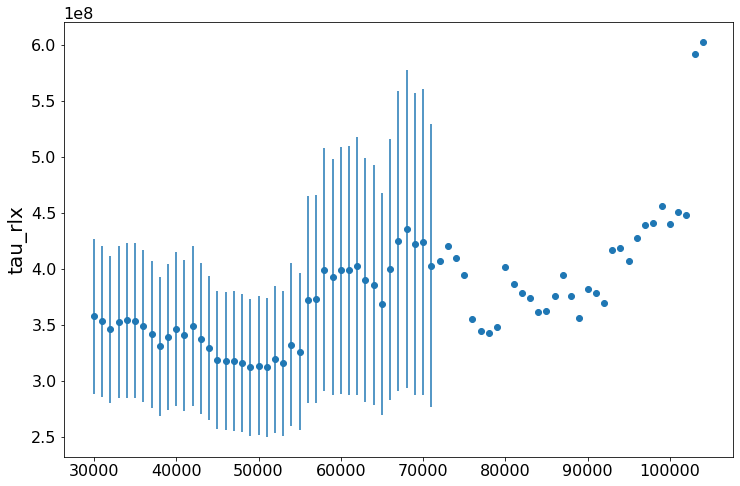

In [19]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_rlx, yerr=dtau_rlx, fmt="o")
plt.ylabel("tau_rlx",fontsize=20)

Text(0, 0.5, 'A_cbot')

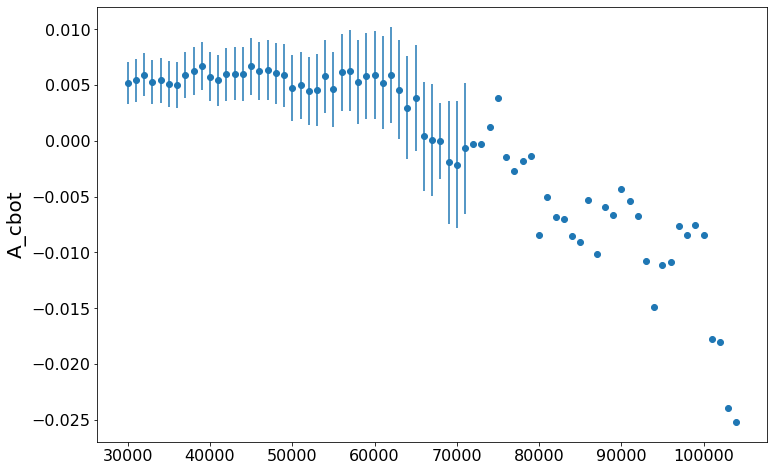

In [20]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_cbot, yerr=dA_cbot, fmt="o")
plt.ylabel("A_cbot",fontsize=20)

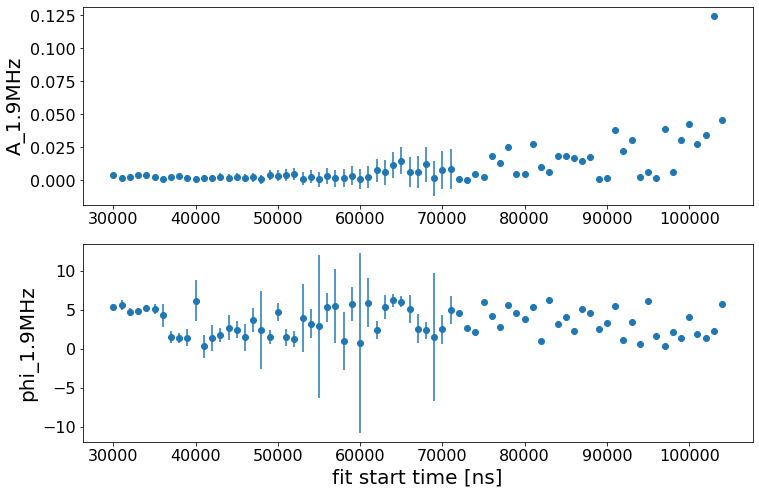

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, np.abs(A_cbovw), yerr=dA_cbovw, fmt="o")
plt.ylabel("A_1.9MHz",fontsize=20)
#plt.plot(fit_st, kband4p, linestyle='solid', linewidth=1, color='red')
#plt.plot(fit_st, kband4m, linestyle='solid', linewidth=1, color='red')


plt.subplot(212)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_cbovw, yerr=dphi_cbovw, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_1.9MHz",fontsize=20)
#plt.plot(fit_st, kband7p, linestyle='solid', linewidth=1, color='red')
#plt.plot(fit_st, kband7m, linestyle='solid', linewidth=1, color='red')

plt.show()

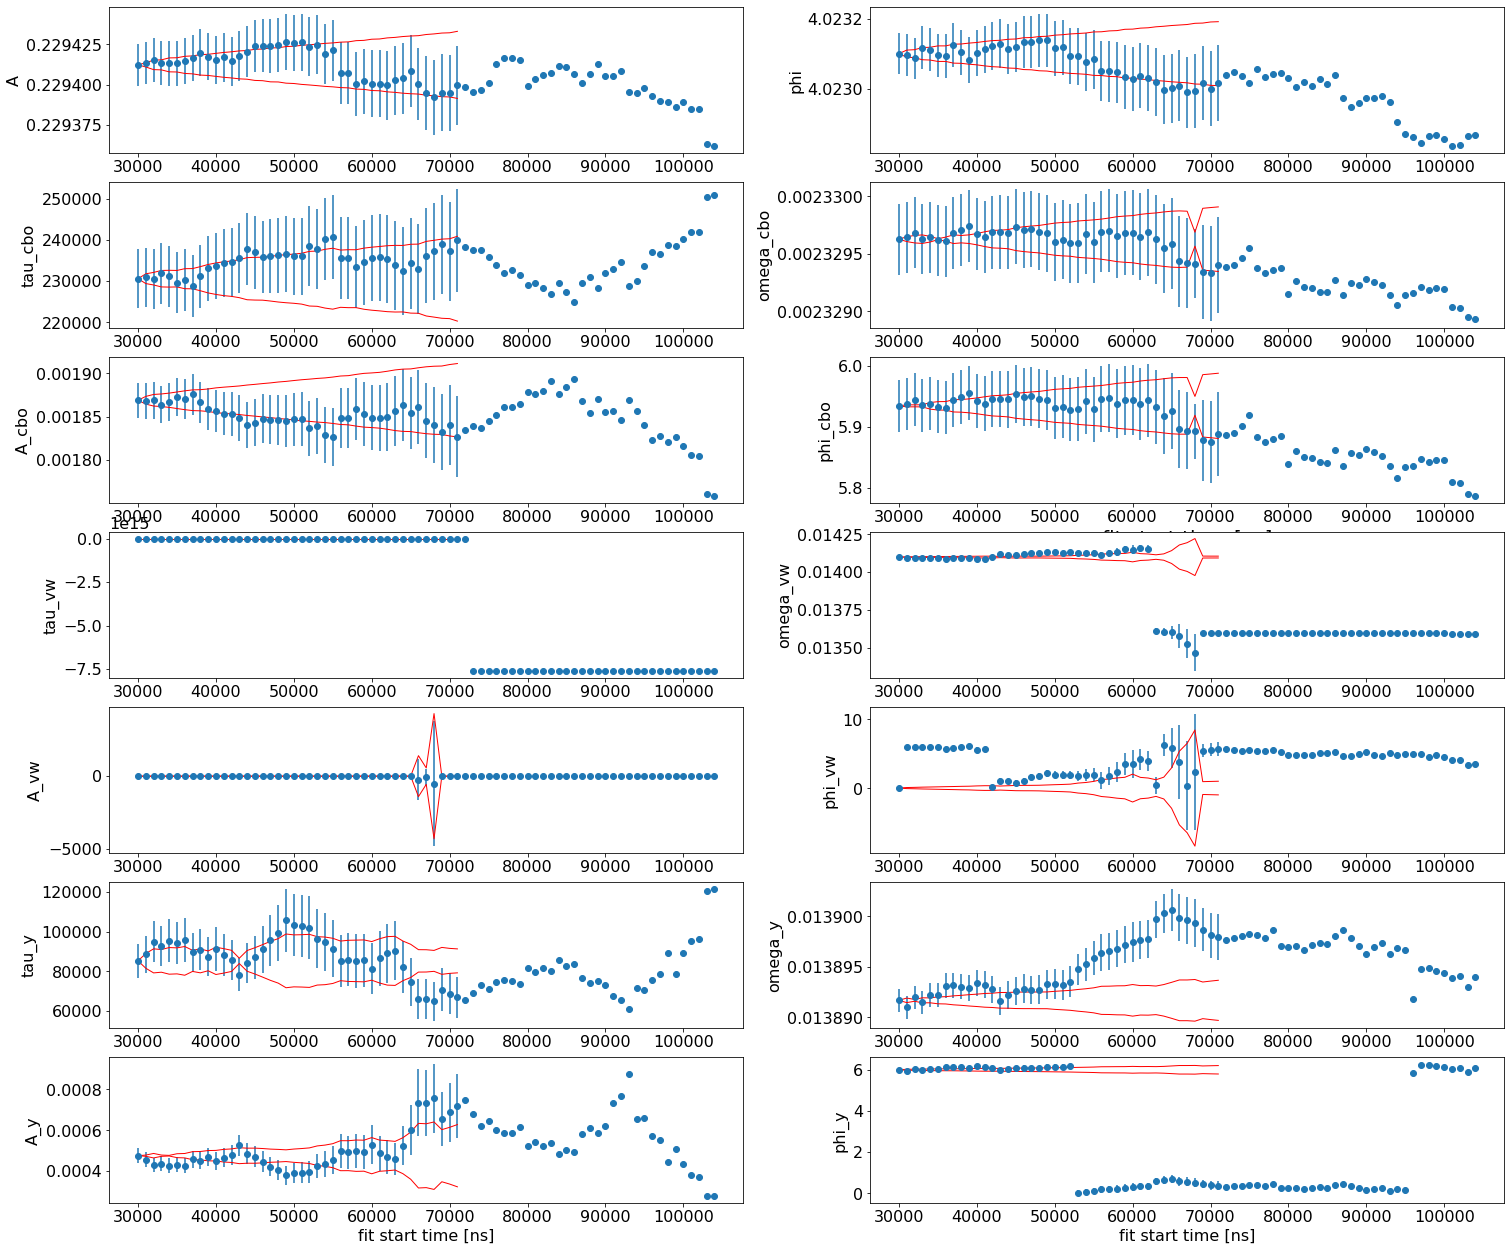

In [22]:
plt.figure(figsize=(25,22))

ax1 = plt.subplot2grid((7,2), (0,0))
# fist line:
#plt.subplot(521)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=16)
plt.plot(fit_st, kband1p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband1m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

ax2 = plt.subplot2grid((7,2), (0,1))
#plt.subplot(522)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi, yerr=dphi, fmt="o")
plt.plot(fit_st, kband3p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband3m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('phi',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax3 = plt.subplot2grid((7,2), (1,0))
#plt.subplot(523)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_cbo, yerr=dtau_cbo, fmt="o")
plt.plot(fit_st, kband5p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband5m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('tau_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False
 
ax4 = plt.subplot2grid((7,2), (1,1))
#plt.subplot(524)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_cbo, yerr=domega_cbo, fmt="o")
plt.plot(fit_st, kband6p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband6m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('omega_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax5 = plt.subplot2grid((7,2), (2,0))
#plt.subplot(525)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_cbo, yerr=dA_cbo, fmt="o")
plt.plot(fit_st, kband4p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband4m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('A_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax6 = plt.subplot2grid((7,2), (2,1))
#plt.subplot(526)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_cbo, yerr=dphi_cbo, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=20)
plt.ylabel("phi_cbo",fontsize=20)
plt.plot(fit_st, kband7p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband7m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('phi_cbo',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax7 = plt.subplot2grid((7,2), (3,0))
#plt.subplot(527)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_vw, yerr=dtau_vw, fmt="o")
plt.plot(fit_st, kband13p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband13m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('tau_vw',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax8 = plt.subplot2grid((7,2), (3,1))
#plt.subplot(528)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_vw, yerr=domega_vw, fmt="o")
plt.ylabel("omega_vw",fontsize=16)
plt.plot(fit_st, kband14p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband14m, linestyle='solid', linewidth=1, color='red')

plt.rcParams["axes.formatter.useoffset"] = False

ax9 = plt.subplot2grid((7,2), (4,0))
#plt.subplot(529)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_vw, yerr=dA_vw, fmt="o")
plt.ylabel("A_vw",fontsize=16)
plt.plot(fit_st, kband12p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband12m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

ax10 = plt.subplot2grid((7,2), (4,1))
#plt.subplot(5210)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_vw, yerr=dphi_vw, fmt="o")
plt.ylabel("phi_vw",fontsize=16)
plt.plot(fit_st, kband15p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband15m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

ax7 = plt.subplot2grid((7,2), (5,0))
#plt.subplot(527)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, tau_y, yerr=dtau_y, fmt="o")
plt.plot(fit_st, kband17p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband17m, linestyle='solid', linewidth=1, color='red')
plt.ylabel('tau_y',fontsize=16)
plt.rcParams["axes.formatter.useoffset"] = False

ax8 = plt.subplot2grid((7,2), (5,1))
#plt.subplot(528)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, omega_y, yerr=domega_y, fmt="o")
plt.ylabel("omega_y",fontsize=16)
plt.plot(fit_st, kband18p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband18m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

ax9 = plt.subplot2grid((7,2), (6,0))
#plt.subplot(529)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, A_y, yerr=dA_y, fmt="o")
plt.ylabel("A_y",fontsize=16)
plt.xlabel("fit start time [ns]",fontsize=16)
plt.plot(fit_st, kband16p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband16m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False

ax10 = plt.subplot2grid((7,2), (6,1))
#plt.subplot(5210)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(fit_st, phi_y, yerr=dphi_y, fmt="o")
plt.xlabel("fit start time [ns]",fontsize=16)
plt.ylabel("phi_y",fontsize=16)
plt.plot(fit_st, kband19p, linestyle='solid', linewidth=1, color='red')
plt.plot(fit_st, kband19m, linestyle='solid', linewidth=1, color='red')
plt.rcParams["axes.formatter.useoffset"] = False


plt.show()
